# Exercises: Neural Networks

## Problems

1. Wine Alcohol Content
2. Wine Labelling


In [ ]:
import pandas as pd
from fastai.basics import *
from fastai.tabular.all import *

# 1. Wine Alcohol Content

Let's take a look at the wine dataset we examined back in Exercises 2. Here's a link to the [dataset's description](https://archive.ics.uci.edu/dataset/109/wine).

In [ ]:
wine = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/wine.csv")
wine.head(3)

,cultivar,alcohol,malic_acid,ash,ash_alc,magnesium,phenols,flavonoids,nonflav,proanthocyanins,color_intensity,hue,od280od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


Build a neural network to predict the % alcohol content in the wine.
* Assess how accurate your model is.
* Assess whether it is overfit.
* Determine the typical error in the prediction and compare it to the range of alcohol content.
* Examine the residuals for outliers or trends.

In [ ]:
%matplotlib inline

# Makes the figure output a bit smaller
plt.rc('figure', dpi=90)

# A helper function to plot generic functions
def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None, xlab=None, ylab=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim is not None: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)
    if xlab is not None: plt.xlabel(xlab)
    if ylab is not None: plt.ylabel(ylab)
    plt.show()

In [ ]:
from fastai.tabular.all import *

dataset = TabularPandas(wine,                        # Pandas DataFrame
            procs=[Categorify,FillMissing,Normalize],     # Pre-processing we want to use
            cat_names = ['cultivar'],      # Categorical variables (will be "Categorify"ed) - encoding the categorical data... changing from categorys to numerical
            cont_names = ['malic_acid', 'ash','ash_alc','phenols','flavonoids','nonflav','proanthocyanins','color_intensity','hue','od280od315','magnesium','proline'],      # Continuous variables (will be "Normalize"d)
            y_names='alcohol',                            # Name of the y variable(s)
            splits=RandomSplitter()(range_of(wine))) # How we'll split into training/validation sets

dls = dataset.dataloaders(bs=64)

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.06309573352336884)

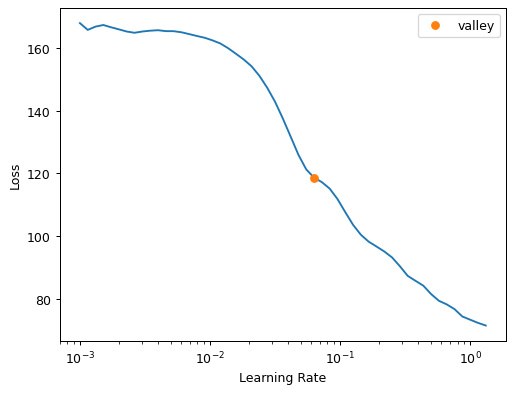

In [ ]:
learn = tabular_learner(dls, layers=[200,100], metrics=rmse) #Creating a tabular learner (data we give to it, list of layers we want (2 layers, of 200 and 100 ReLu units), our loss function)

# A learning rate finder, like we made in class.
learn.lr_find(start_lr=1e-3, end_lr=1e3)

In [ ]:
learn = tabular_learner(dls, metrics=rmse, lr=0.07244359701871872)
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,_rmse,time
0,166.516541,169.716431,13.027526,00:00
1,165.716965,168.334229,12.974368,00:00
2,165.616638,165.220612,12.853817,00:00
3,165.071136,161.364120,12.702918,00:00
4,163.999222,156.578979,12.513152,00:00
5,162.489761,149.806122,12.239532,00:00
6,160.505722,141.714127,11.904374,00:00
7,157.458359,125.034866,11.181899,00:00
8,152.777786,105.727127,10.282370,00:00
9,146.054993,74.773354,8.647159,00:00


# 2. Wine Labelling

Using the same dataset as before, let's ask a different question: can we identify the kind of grape the wine is made from?
* Build a neural network
* Assess whether it is overfit.
* Assess the accuracy of the model
* Examine the [confusion matrix](https://docs.fast.ai/interpret.html#interpretation).

For this one, you'll need to specify that you're predicting a category, not a continuous number. Specify that in the `TabularPandas` call by indicating `y_block = CategoryBlock`. Additionally, change the metric in the learner to the `error_rate`.

In [ ]:
wine = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/wine.csv")
wine.head(3)

,cultivar,alcohol,malic_acid,ash,ash_alc,magnesium,phenols,flavonoids,nonflav,proanthocyanins,color_intensity,hue,od280od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [ ]:
from fastai.tabular.all import *


dataset = TabularPandas(wine,                        # Pandas DataFrame
            procs=[FillMissing,Normalize],# Pre-processing we want to use     # Categorical variables (will be "Categorify"ed) - encoding the categorical data... changing from categorys to numerical
            cont_names = ['alcohol','malic_acid', 'ash','ash_alc','phenols','flavonoids','nonflav','proanthocyanins','color_intensity','hue','od280od315','magnesium','proline'],      # Continuous variables (will be "Normalize"d)
            y_block= CategoryBlock,
            y_names='cultivar',# Name of the y variable(s)
            splits=RandomSplitter()(range_of(wine))) # How we'll split into training/validation sets

dls = dataset.dataloaders(bs=64)



/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.018197009339928627)

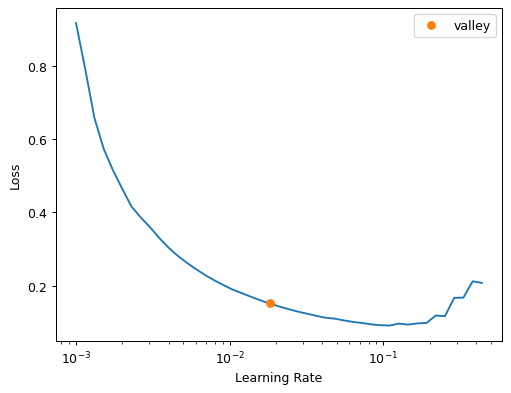

In [ ]:
learn = tabular_learner(dls, layers=[200,100], metrics=error_rate) #Creating a tabular learner (data we give to it, list of layers we want (2 layers, of 200 and 100 ReLu units), our loss function)

# A learning rate finder, like we made in class.
learn.lr_find(start_lr=1e-3, end_lr=1e3)

In [ ]:
learn = tabular_learner(dls, metrics=error_rate, lr=0.018197009339928627)
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.319971,0.968915,0.142857,00:00
1,0.790268,0.506714,0.057143,00:00
2,0.562787,0.256010,0.028571,00:00
3,0.439232,0.141631,0.028571,00:00
4,0.356629,0.088723,0.028571,00:00
5,0.297407,0.079694,0.028571,00:00
6,0.258099,0.066350,0.028571,00:00
7,0.231541,0.059985,0.028571,00:00
8,0.204833,0.045339,0.028571,00:00
9,0.183073,0.043214,0.028571,00:00
